In [3]:
using Plots
using LaTeXStrings
#using Pkg
#Pkg.add("Plots")
#using MYPaquete

#import Pkg; Pkg.add("Plots")

   Resolving package versions...


LoadError: expected package `gmsh [a3f5b5a8]` to exist at path `/Users/reula/.julia/packages/gmsh/EFT8D`

## Demo: la ecuación de onda.

Vamos a resolver la ecuación de onda en una dimensión y en el círculo, $C$ de longitud unidad. 

Vamos a integrar tres tópicos del curso: 

1- Diferencias finitas

2- Métodos de Runge-Kuta

3- Integración

video con explicación [aquí](https://drive.google.com/file/d/14NIWcRaapZVoC4IrnPj26RsPUi4M4Cfe/view?usp=sharing)

La ecuación de onda más simple está dada por (para $u=u(t,x)$)

$$
\frac{\partial u}{\partial t} = -c \frac{\partial u}{\partial x}
$$

Representa una onda moviéndose a la derecha (si $c>0$) con velocidad $c$. 
Es el bloque mínimo a partir del cual construimos todos los fenómenos ondulatorios. Por ejemplo, la cuerda de una guitarra tiene dos de estas ondas, una moviéndose a la derecha y la otra hacia la izquierda.

Dos propiedades muy importantes son las siguientes: 

**1)** Si damos un valor a $t=t_0$, $u(t_0,x) = u_0(x)$ luego la solución es: $u(t,x)  = u_0(\phi(x,t)) = u_0(x-c(t-t_0))$
podemos ver que es simplemente el *valor inicial* $u_0$, desplazado una distancia $c(t-t_0)$ hacia la derecha ($c>0$).

$$
\frac{\partial u(t,x)}{\partial t} = u_0(\phi(t,x))' \frac{\partial (x-c(t-t_0))}{\partial t} = -c u_0(\phi(t,x))' 
$$
Por otro lado, 

$$
\frac{\partial u(t,x)}{\partial x}= \frac{\partial u_0}{\partial x}(\phi(t,x)) = u_0(\phi(t,x))' \frac{\partial (x-c(t-t_0))}{\partial x} = u_0(\phi(t,x))'.
$$

Y por lo tanto, 

$$
\frac{\partial u(t,x)}{\partial t} = -c \frac{\partial u(t,x)}{\partial x},
$$

Lo que nos muestra que es una solución de nuestro sistema. 

Como $\phi(t,x)$ es constante a lo largo de la línea $x(t) = c(t-t_0)$, vemos que (por ejemplo siguiendo un máximo de $u_0$) que la solución a lo largo del tiempo es simplemente la traslación de $u_0$ a velocidad constante $c$.

### Resolviendo la ecuación de onda en el círculo de longitud 1 

Por simplicidad resolveremos numéricamente la ecuación de onda en el círculo de longitud 1. Una manera de hacer eso es pensar que estamos resolviendo con una función inicial $u_0$ que tiene período 1, es decir $u_0(x+1) = u_0(x) \forall x$.
Pero primero veamos la solución exacta con un dato inicial simple, que luego usaremos en la simulación numérica.
Definiremos una función $u_0$ que solo es distinta de cero en una región pequeña dentro del círculo, pero que es bastante suave, en nuestro caso tiene derivada tercera contúnua. Para ello pegaremos un polinomio de 8vo orden en dos lugares donde tiene raices de órden $4$ con la función cero por afuera.

$$
u_0(x) = \{
\begin{array}{c}
0 & \;si \;\; x < 1/4\;\; o \;\; x > 3/4 \\
(x-1/4)^4*(x-3/4)^4*2^{16} & \; si \;\; 1/4 \leq x \leq 3/4
\end{array}
%\right.
$$


In [4]:
u_0(x) = (x>1/4 && x < 3/4) ? (x-1/4)^4*(x-3/4)^4*2^16 : 0
plot(u_0, xlim=(0,1), title="dato inicial", label=L"$u_0$", xlabel=L"x")

Como vamos a resolver en un círculo de longitud inicial (o sea con período espacial de longitud 1) hacemos la función periódica.

In [ ]:
u_0_p(x) = (mod(x,1)>1/4 && mod(x,1) < 3/4) ? (mod(x,1)-1/4)^4*(mod(x,1)-3/4)^4*2^16 : 0
#plot(yi, xlim=(0,1)) #redefinimos la función y para que sea periódica a los fines del gráfico siguiente.

Graficamos la solución durante un período. Usamos: **c = 1**.

In [ ]:
P=50
plot(xlim=(0,1)
    , label="exacta"
    , legend=:false
    , xlabel=L"x")
for i in 1:P
    t = (i-1)/(P-1)
plot!(x -> u_0_p(x-t)+i/7
        , xlim=(0,1)
        )
end
current()

**2)** La cantidad 
$$
\mathcal{E}(t) = \int_C u(t,x)^2 \; dx 
$$

No depende del tiempo, es conservada. Para ver esto tomamos la derivada y la pasamos dentro de la integral (estamos suponiendo que eso se puede hacer pues suponemos el dato para nuestra ecuación será diferenciable). 

\begin{align*}
\frac{d\mathcal{E}}{dt} &= \int_C  \frac{\partial u^2}{\partial t} \; dx \\
&= \int_C 2 u\frac{\partial u}{\partial t} \; dx \\
&= \int_C -2c\; u \; \frac{\partial u}{\partial x} \; dx \\
&= -c \int_C   \frac{\partial u^2}{\partial x} \; dx \\
&= -c \; u^2(t,x)|_{x=0}^{x=1} = -c[u^2(t,1) - u^2(t,0)]\\
&= 0
\end{align*}

## Resolución Numérica
### Método de líneas

Para encontrar una aproximación a sus soluciones primero discretizamos en espacio y reemplazamos las derivadas espaciales por diferencias finitas $\partial_x \to D_x$ en puntos equidistantes.

 * |---x---x---x---x---x---x---x---x---x---x---x---x---|
 
 * $1 \;\;\,   2 \;\;\;   3 \;\;\;\;   4 \;\;\;\;   5  \;\;\;  \;\;\; \;\;\; \;\;\; \;\;\;  \;\;\; \;\;\; \;\;\;\;\;\; \;\;\; \;\;\; \;\;\;\;\;\;\;\;\;                  N \;\;\;   1$

Notemos de $dx = 1/N$

**Vamos a usar las diferencias centradas de orden 2:**

In [5]:
function Dc2x(v,dx)
    N = length(v)
    dv = zeros(N)
    for i in 1:N
        dv[i] = (v[i+1] - v[i-1])/dx/2
    end
    return dv[:]
end

#versión periódica 
function Dc2x_per(v,dx)
    N = length(v)
    dv = zeros(N)
    for i in 1:N
        dv[i] = (v[mod1((i+1), N)] - v[mod1((i + N -1), N)])/dx/2
    end
    return dv[:]
end

Dc2x_per (generic function with 1 method)

Con esta aproximación llegamos entonces a un sistema de N ecuaciones ordinarias (para las componentes de $v$):

$$
\frac{dv}{d t} = -c Dc2x(v,dx)
$$

Para aproximar este sistema de ecuaciones ordinarias hacemos una discretización en tiempo, de paso $dt$, y usamos RK4

In [6]:
function f(w,t,p)
    c, dx = p
    return dw = -c*Dc2x_per(w,dx)
end

function RK4(f,w0,t0,h,p)
    k1 = h*f(w0,t0,p)
    k2 = h*f(w0+0.5*k1, t0+0.5*h,p)
    k3 = h*f(w0+0.5*k2, t0+0.5*h,p)
    k4 = h*f(w0+k3, t0+h,p)
    return w0 + (k1 + 2k2 + 2k3 + k4)./6
end

function ODEproblem(Method, f, w0, intervalo, M,p)
    ti,tf = intervalo
    h = (tf-ti)/(M-1)
    N = length(w0)
    w = zeros(M,N)
    t = zeros(M)
    w[1,:] = w0
    t[1] = ti
    for i in 2:M
        t[i] = t[i-1] + h
        w[i,:] = Method(f,w[i-1,:],t[i-1],h,p)
    end
    return (t ,w)
end

ODEproblem (generic function with 1 method)

### Generando un dato inicial

In [ ]:
#yi(x) = (mod(x,1)>1/4 && mod(x,1) < 3/4) ? (mod(x,1)-1/4)^4*(mod(x,1)-3/4)^4*2^16 : 0
plot(u_0, xlim=(0,1), title="Dato Inicial", xlabel=L"x", label=L"u_0")

Con este dato inicial construimos nuestro vector de datos inciales para la solución discreta:

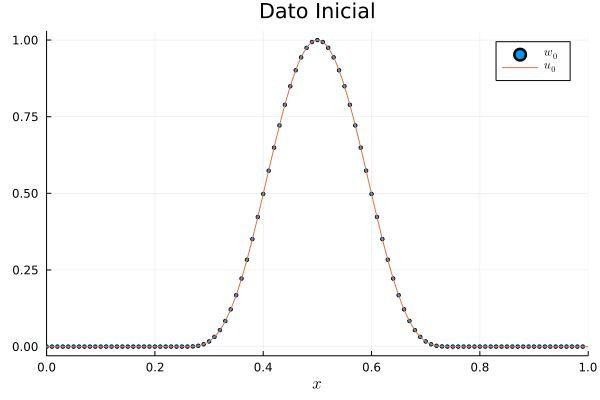

In [7]:
N = 100 # número de puntos iniciales
#N = 1000 # para usar más puntos espaciales 
dx = 1/N # distancia entre dos puntos consecutivos
#w0 = zeros(N) 
x = [(i-1)*dx for i in 1:N ] # los puntos equiespaciados donde evaluaremos el dato inicial.
w0 = u_0.(x) # la evaluación de los datos iniciales para obtener el vector de datos iniciales.
scatter(x,w0, ms=2, title="vector aproximación numérica", label=L"w_0")
plot!(u_0, xlim=(0,1), title="Dato Inicial", xlabel=L"x", label=L"u_0")


In [ ]:
#plot(Dc2x_per(w0,dx)) # si queremos ver que funcionen las diferencias finitas.


### Evolucionando

In [8]:
M = 2000 # pasos temporales (para que funcione también con N = 1000)
intervalo=(0.0, 4) # evolucionamos por 4 períodos (c=1)
p = (1, dx) # velocidad = 1
#plot(f(w0,0.,p))
#@time t, w = ODEproblem(RK4, f, w0, intervalo, M,p); # si queremos ver cuanto tarda y cuanta memoria consume.
t, w = ODEproblem(RK4, f, w0, intervalo, M,p);

Una vez resuelto podemos comparar las aproximaciones encontradas con la solución exacta, como el tiempo final es $T=4$ y la velocidad es unitaria, al tiempo final la solución exacta será igual a la inicial. ($u(4,x) = u_0(x - 4c) = u_0(x - 4) = u_0(x)$).

In [ ]:
scatter(x,w[end,:], label="w a T=$(intervalo[2]), con N=$N", ms = 2)
plot!(x,u_0_p, label="exacta")

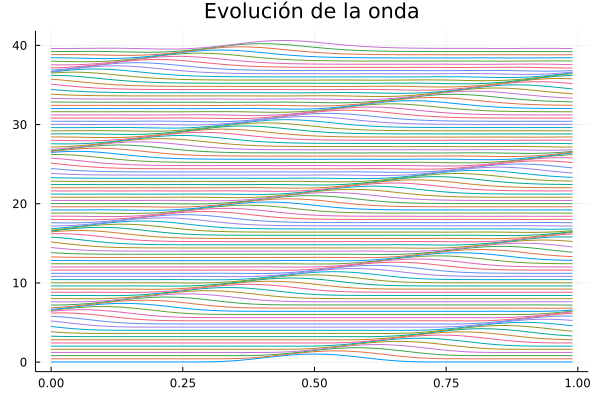

In [9]:
scatter(title="Evolución de la onda", legend=:false)
for i in 1:20:M
    plot!(x,w[i,:].+i/50)
end
current()

In [12]:
anim = @animate for i ∈ 1:10:M
    scatter(x,w[i,:],label="w"
        #, yaxis = ("conserv", (-1.5,1.5))
        , ms = 2
    )
    plot!(x -> u_0(x-t[i])
        , xlim=(0,1)
        , label="exacta")
        
end

gif(anim, "Resultados/Movies/onda_$N.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /Users/reula/Julia/julia_examples/Ondas_demo/Resultados/Movies/onda_100.gif
└ @ Plots /Users/reula/.julia/packages/Plots/0MO2T/src/animation.jl:137


Plots.AnimatedGif("/Users/reula/Julia/julia_examples/Ondas_demo/Resultados/Movies/onda_100.gif")

### Conservación de la energía

Ahora podemos ver si esta se conserva. Para hacer la integral en este caso, y por razones que se estudian más adelante, conviene usar el método del trapecio, que básicamente, para el caso periódico, consiste en sumar los valores de $w^2$ todos los puntos. Para ver la conservación de la energía es conveniente quitar el valor inicial y así sólo ver la variación (que será muy muy pequeña). Además vamos a graficar el negativo de la variación. Cómo veremos la energía decae (debido a cierta *disipación* del método de Runge-Kutta 4), por lo tanto para graficar la variación y eventualmente tomar logaritmos, es que tomamos el negativo de la variación.

In [ ]:
δE = [(w[i,:]'*w[i,:] - w[1,:]'*w[1,:])*dx for i in 2:M];

In [ ]:
scatter(t[1:end],-δE[1:end]
    #,yscale=:log10, ylim=(10^(-12),0)
    ,label="(-) Diferencia de Energías, N = $N"
    ,legend=:topleft
    ,ms = 1
)

## Repetimos con $N=1000$

### Tareas: 

1) Implemente RK2 y vea qué sucede en ese caso.

2) Use menos puntos en la discretización temporal y vea que sucede. (Ésta, y la pregunta anterior, tienen respuestas concretas, pero se ven en cursos más avanzados.)

3) Calcule el error cometido con respeto a la solución y vea (gráficamente) el orden de convergencia tanto en $dx$ y $dt$. 

4) Piense en una manera de calcular el $Q$ para estas aproximaciones. 

5) Implemente las diferencias finitas centradas de 4to orden y vea si mejora el error en la solución. 







![cuerdas](Resultados/Movies/ropes_anim_fps20.gif)

![púlsares_1](Resultados/BHNS_R30_r640_sync_B1-JP_cap_0005.png) 

![púlsares_2](Resultados/BHNS_cap_side_0007.png)